# Problema 1

In [25]:
import cv2
import numpy as np

def modificar_imagen(ruta_imagen, color):
    # Leer la imagen
    imagen = cv2.imread(ruta_imagen)
    
    # Dividir la imagen en canales Azul, Verde y Rojo
    B, G, R = cv2.split(imagen)
    
    # Crear canales en blanco
    blanco = np.zeros_like(B)
    
    if color == 1:
        # Solo el canal Azul activo
        imagen_modificada = cv2.merge([B, blanco, blanco])
    elif color == 2:
        # Solo el canal Verde activo
        imagen_modificada = cv2.merge([blanco, G, blanco])
    elif color == 3:
        # Solo el canal Rojo activo
        imagen_modificada = cv2.merge([blanco, blanco, R])
    elif color == 10:
        # Canales Rojo y Verde activos
        imagen_modificada = cv2.merge([blanco, G, R])
    elif color == 20:
        # Canales Verde y Azul activos
        imagen_modificada = cv2.merge([B, G, blanco])
    elif color == 30:
        # Canales Azul y Rojo activos
        imagen_modificada = cv2.merge([B, blanco, R])
    else:
        # Si el parámetro color no es reconocido, devolver la imagen original
        imagen_modificada = imagen
    
    return imagen_modificada

# Ejemplo de uso
imagen_modificada = modificar_imagen('img/img3.jpeg', 30)
cv2.imwrite('imagen_modificada_img30.jpg', imagen_modificada)


True

# Problema 2

In [29]:
def reconstruir_imagen_color(carpeta, output_path):
    # Construir las rutas de los archivos
    azul_path = f'{carpeta}/{carpeta}_salida_gray_azul.jpg'
    rojo_path = f'{carpeta}/{carpeta}_salida_gray_rojo.jpg'
    verde_path = f'{carpeta}/{carpeta}_salida_gray_verde.jpg'
    
    # Leer las imágenes en escala de grises
    azul = cv2.imread(azul_path, cv2.IMREAD_GRAYSCALE)
    rojo = cv2.imread(rojo_path, cv2.IMREAD_GRAYSCALE)
    verde = cv2.imread(verde_path, cv2.IMREAD_GRAYSCALE)
    
    # Verificar que las imágenes tienen el mismo tamaño
    if azul.shape != rojo.shape or azul.shape != verde.shape:
        raise ValueError("Las imágenes no tienen el mismo tamaño.")
    
    # Combinar las imágenes en una imagen a color
    imagen_color = cv2.merge([azul, verde, rojo])
    
    # Guardar la imagen resultante
    cv2.imwrite(output_path, imagen_color)

# Ejemplo de uso
reconstruir_imagen_color('imagen1', 'imagen1_color.jpg')
reconstruir_imagen_color('imagen2', 'imagen2_color.jpg')
reconstruir_imagen_color('perro', 'perro1_color.jpg')


# Problema 3

In [45]:
import os

def crear_escala_grises_3d(ruta_imagen, carpeta_salida):
    # Crear la carpeta de salida si no existe
    if not os.path.exists(carpeta_salida):
        os.makedirs(carpeta_salida)
    
    # Leer la imagen a color
    imagen = cv2.imread(ruta_imagen)
    
    # Dividir la imagen en canales Azul, Verde y Rojo
    B, G, R = cv2.split(imagen)
    
    # Guardar cada canal como una imagen en escala de grises
    cv2.imwrite(os.path.join(carpeta_salida, 'salida_gray_azul.jpg'), B)
    cv2.imwrite(os.path.join(carpeta_salida, 'salida_gray_verde.jpg'), G)
    cv2.imwrite(os.path.join(carpeta_salida, 'salida_gray_rojo.jpg'), R)

# Ejemplo de uso
crear_escala_grises_3d('img/img2.jpeg', 'img2')


# Problema 4

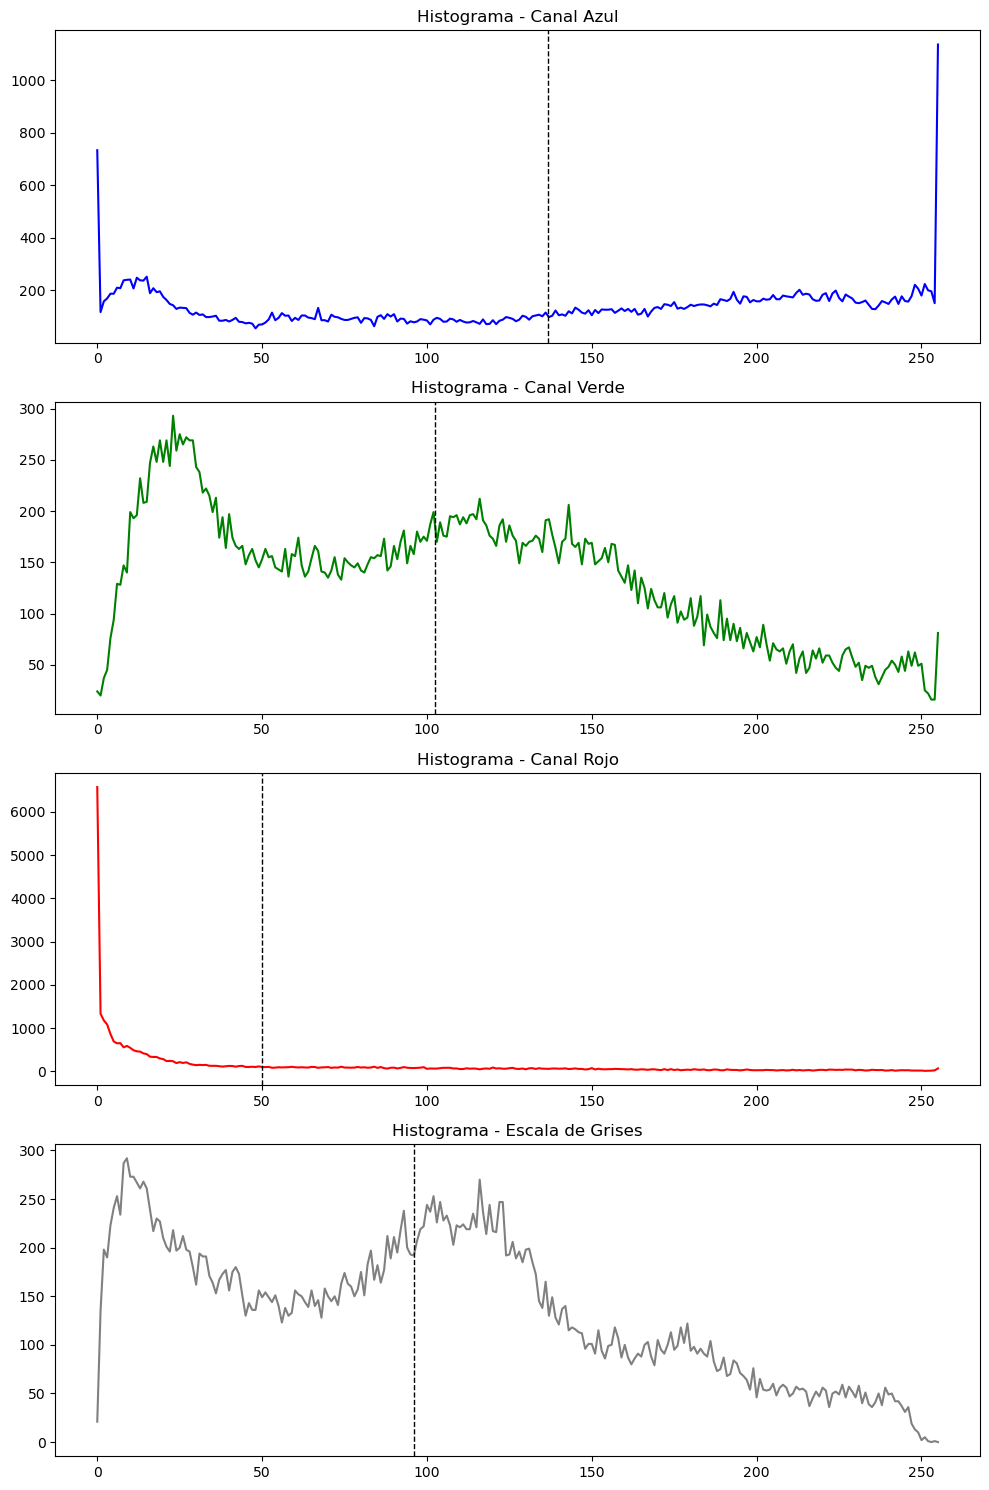

NameError: name '_gris_ponderada' is not defined

In [59]:
import matplotlib.pyplot as plt

def mostrar_histogramas(ruta_imagen):
    # Leer la imagen
    imagen = cv2.imread(ruta_imagen)
    
    # Dividir la imagen en canales Azul, Verde y Rojo
    B, G, R = cv2.split(imagen)
    
    # Crear una imagen en escala de grises usando el promedio aritmético
    gris = (B.astype(np.float32) + G.astype(np.float32) + R.astype(np.float32)) / 3
    gris = gris.astype(np.uint8)
    
    # Calcular los histogramas
    hist_B = cv2.calcHist([B], [0], None, [256], [0, 256])
    hist_G = cv2.calcHist([G], [0], None, [256], [0, 256])
    hist_R = cv2.calcHist([R], [0], None, [256], [0, 256])
    hist_gris = np.histogram(gris, bins=256, range=(0, 256))[0]

    # Calcular las medias
    media_B = np.mean(B)
    media_G = np.mean(G)
    media_R = np.mean(R)
    media_gris = np.mean(gris)
    
    # Crear las gráficas de los histogramas
    fig, axs = plt.subplots(4, 1, figsize=(10, 15))

    # Histograma canal Azul
    axs[0].plot(hist_B, color='blue')
    axs[0].axvline(media_B, color='black', linestyle='dashed', linewidth=1)
    axs[0].set_title('Histograma - Canal Azul')

    # Histograma canal Verde
    axs[1].plot(hist_G, color='green')
    axs[1].axvline(media_G, color='black', linestyle='dashed', linewidth=1)
    axs[1].set_title('Histograma - Canal Verde')

    # Histograma canal Rojo
    axs[2].plot(hist_R, color='red')
    axs[2].axvline(media_R, color='black', linestyle='dashed', linewidth=1)
    axs[2].set_title('Histograma - Canal Rojo')

    # Histograma escala de grises
    axs[3].plot(hist_gris, color='gray')
    axs[3].axvline(media_gris, color='black', linestyle='dashed', linewidth=1)
    axs[3].set_title('Histograma - Escala de Grises')
    
    # Mostrar las gráficas
    plt.tight_layout()
    plt.show()

# Ejemplo de uso
mostrar_histogramas('img/img3.jpeg')
_gris_ponderada.jpg

# Problema 5

El enfoque de escala de grises ponderado es una técnica que convierte una imagen a color en una imagen en escala de grises utilizando un conjunto de coeficientes de ponderación para cada uno de los canales de color (Rojo, Verde y Azul). La idea detrás de esta técnica es que los diferentes colores no contribuyen de manera igual a la percepción de la luminosidad en una imagen. En el enfoque ponderado, se utilizan coeficientes específicos para cada canal para reflejar mejor cómo el ojo humano percibe la luminosidad.

Una fórmula comúnmente utilizada para el enfoque ponderado es:

\[ \text{Gris} = 0.299 \times R + 0.587 \times G + 0.114 \times B \]

La fórmula de escala de grises ponderada es una técnica utilizada en la conversión de imágenes a color en imágenes en escala de grises que se basa en la percepción de la luminosidad por el ojo humano. En lugar de simplemente promediar los valores de los canales de color (rojo, verde y azul), esta técnica asigna diferentes pesos a cada canal para reflejar mejor cómo los humanos perciben la luminosidad.

### Explicación de la Fórmula

#### Percepción Humana de la Luminosidad

El ojo humano no percibe todos los colores con la misma intensidad. La sensibilidad del ojo a los colores varía, siendo más sensible al verde, seguido del rojo y finalmente al azul. Esto significa que el verde contribuye más a la percepción de brillo que los otros colores.

- **Rojo (R)**: Contribuye en un 29.9% a la percepción de la luminosidad.
- **Verde (G)**: Contribuye en un 58.7% a la percepción de la luminosidad.
- **Azul (B)**: Contribuye en un 11.4% a la percepción de la luminosidad.

Estos coeficientes no son arbitrarios; están basados en la CIE (Commission Internationale de l'Éclairage), que estudia cómo el ojo humano percibe la luz y el color.

### Desglose de la Fórmula

1. **Rojo (R)**: Se multiplica el valor del canal rojo por 0.299. Aunque el rojo es un color prominente, su contribución a la percepción de brillo es menor en comparación con el verde.
   
2. **Verde (G)**: Se multiplica el valor del canal verde por 0.587. El verde tiene el mayor peso porque el ojo humano es más sensible a este color.

3. **Azul (B)**: Se multiplica el valor del canal azul por 0.114. Aunque el azul es un componente esencial del color, su contribución a la percepción de brillo es la menor.


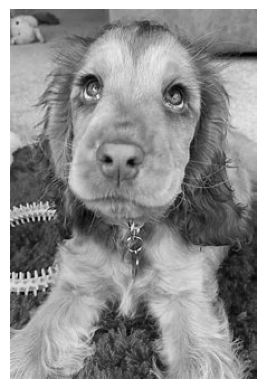

'img4_gris_ponderada.jpeg'

In [64]:
def convertir_a_gris_ponderado(imagen_path):
    # Carga la imagen
    imagen = cv2.imread(imagen_path)
    
    # Verifica que la imagen se haya cargado correctamente
    if imagen is None:
        raise ValueError("La imagen no se pudo cargar. Verifique la ruta de la imagen.")
    
    # Obtén los canales de color (BGR)
    b, g, r = cv2.split(imagen)
    
    # Aplica la fórmula de escala de grises ponderada
    gris_ponderado = 0.299 * r + 0.587 * g + 0.114 * b
    
    # Asegura que los valores estén en el rango [0, 255] y convierte a uint8
    gris_ponderado = np.clip(gris_ponderado, 0, 255).astype(np.uint8)
    
    # Combina el canal de gris ponderado para obtener una imagen en escala de grises
    imagen_gris = cv2.merge([gris_ponderado, gris_ponderado, gris_ponderado])
    
    return imagen_gris

# Prueba la función y muestra la imagen resultante
imagen_path = 'img/img4.jpeg'
imagen_resultante = convertir_a_gris_ponderado(imagen_path)
output_path = 'img4_gris_ponderada.jpeg'
cv2.imwrite(output_path, imagen_resultante)

# Mostrar la imagen resultante
imagen_mostrada = cv2.cvtColor(imagen_resultante, cv2.COLOR_BGR2RGB)
plt.imshow(imagen_mostrada)
plt.axis('off')
plt.show()

output_path

# Problema 6